## openCV를 통해 모니터에 카메라 화면 출력

In [ ]:
import cv2

video = cv2.VideoCapture('http://192.168.0.109:81/stream')
frame_size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))

while True:
    ret, frame = video.read()
    if not ret:
        break

    cv2.imshow('ESP32-CAM', frame)

    # Press 'Esc' to stop
    key = cv2.waitKey(25)
    if key == 27:
        break

if video.isOpened():
    video.release()

cv2.destroyAllWindows()

## 카메라 모듈 화면 표시 & 얼굴인식

In [ ]:
from imutils.video import VideoStream
from imutils import face_utils
import argparse
import imutils
import time
import dlib
import cv2
import easydict
 
# construct the argument parser and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-p", "--shape-predictor", required=True,
#     help="/home/behan/3_1/current_circuit/shape_predictor_68_face_landmarks.dat")
# args = vars(ap.parse_args())
 
args = easydict.EasyDict({"shape_predictor": "./shape_predictor_68_face_landmarks.dat"})
 
# initialize dlib's face detector (HOG-based) and then create the
# facial landmark predictor
print("[INFO] loading facial landmark predictor...")
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])
 
# initialize the video stream and sleep for a bit, allowing the
# camera sensor to warm up
print("[INFO] camera sensor warming up...")
#vs = VideoStream(src=0).start()
# vs = VideoStream(usePiCamera=True).start() # Raspberry Pi
# time.sleep(2.0)
 
video = cv2.VideoCapture('http://192.168.0.109:81/stream')
frame_size = (int(video.get(cv2.CAP_PROP_FRAME_WIDTH)), int(video.get(cv2.CAP_PROP_FRAME_HEIGHT)))
 
# loop over the frames from the video stream
while True:
    # grab the frame from the threaded video stream, resize it to
    # have a maximum width of 400 pixels, and convert it to
    # grayscale
    # frame = vs.read()
    ret, frame = video.read()
    if not ret:
        print("video road fail!!!")
        break
    # frame = imutils.resize(frame, width=400)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
 
    # detect faces in the grayscale frame
    rects = detector(gray, 0)
 
    # check to see if a face was detected, and if so, draw the total
    # number of faces on the frame
    if len(rects) > 0:
        text = "{} face(s) found".format(len(rects))
        cv2.putText(frame, text, (10, 20), cv2.FONT_HERSHEY_SIMPLEX,
            0.5, (0, 0, 255), 2)
 
    # loop over the face detections
    for rect in rects:
        # compute the bounding box of the face and draw it on the
        # frame
        (bX, bY, bW, bH) = face_utils.rect_to_bb(rect)
        cv2.rectangle(frame, (bX, bY), (bX + bW, bY + bH),
            (0, 255, 0), 1)
 
        # determine the facial landmarks for the face region, then
        # convert the facial landmark (x, y)-coordinates to a NumPy
        # array
        shape = predictor(gray, rect)
        shape = face_utils.shape_to_np(shape)
 
        # loop over the (x, y)-coordinates for the facial landmarks
        # and draw each of them
        for (i, (x, y)) in enumerate(shape):
            cv2.circle(frame, (x, y), 1, (0, 0, 255), -1)
            cv2.putText(frame, str(i + 1), (x - 10, y - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0, 0, 255), 1)
 
    # show the frame
    cv2.imshow("Frame", frame)
    key = cv2.waitKey(1) & 0xFF
 
    # if the `q` key was pressed, break from the loop
    if key == ord("q"):
        break

# do a bit of cleanup
cv2.destroyAllWindows()
# vs.stop()

## 아두이노 시리얼 통신 pyserial

In [ ]:
# 파이썬에서 아두이노로 데이터 보내기

import serial
import time


# "COM3"부분에 환경에 맞는 포트 입력
ser = serial.Serial('/dev/cu.usbmodem2017_2_251', 9600)


while True:
    if ser.readable():
        val = input()

        if (val == '1'):
            val = val.encode('utf-8') #보내기전 encoding
            ser.write(val)
            print("LED ON")
            time.sleep(0.5)
        elif (val == '0'):
            val = val.encode('utf-8')
            ser.write(val)
            print("LED OFF")
            time.sleep(0.5)
        else:
            print("end")
            break

In [ ]:
#아두이노에서 파이썬으로 데이터 입력받기

import serial
import time

ser = serial.Serial('/dev/cu.usbmodem2017_2_251', 9600)

while True:
    if ser.readable():
        val = ser.readline()
        print(val.decode())
    

81.00
35.00
18.00
12.00
9.00
9.00
9.00
9.00
9.00
9.00
9.00
10.00
10.00
10.00
10.00
10.00
9.00
9.00
9.00
8.00
8.00
8.00
8.00
8.00
8.00
8.00
8.00
8.00
8.00
8.00
4.00
-2.00
-1.00
2.00
-4.00
-7.00
0.00
2.00
-6.00
-13.00
-14.00
-13.00
-14.00
-12.00
-12.00
-15.00
-18.00
-20.00
-26.00
-33.00
-39.00
-41.00
-43.00
-44.00
-42.00
-42.00
-42.00
-41.00
-41.00
-41.00
-40.00
-40.00
-40.00
-40.00
-40.00
-40.00
-40.00
-40.00
-40.00
-40.00
-41.00
-41.00
-41.00
-41.00
-41.00
-42.00
-42.00
-42.00
-41.00
-41.00
-41.00
-41.00
-40.00
-40.00
-40.00
-40.00
-40.00
-40.00
-40.00
-40.00
-40.00
-40.00
-40.00
-41.00
-41.00
-44.00
-42.00
-42.00
-42.00
-42.00
-42.00
-41.00
-41.00
-41.00
-41.00
-41.00
-41.00
serial close.


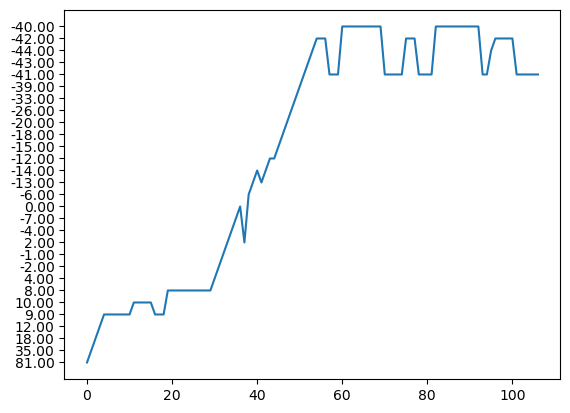

In [42]:
# 실험 4 휘스톤브릿지 전압 측정

import serial
import time
import numpy as np
import matplotlib.pyplot as plt
import csv

ser = serial.Serial('/dev/cu.usbmodem2017_2_251', 9600) #serial 연결 "/dev/~~~"는 아두이노 연결된 포트 입력

ser.close()
ser.open()

v_out = []
try:
    while True:
        if ser.readable():
            read = ser.readline()
            val = read[:len(read)-2].decode()       # \r \n 제거
            print(val)
            # with open("output.csv", "a") as fp:     # 'w'모드: 덮어쓰기, 'a'모드 : 추가
            #     wr = csv.writer(fp, dialect='excel')
            #     wr.writerow(val)
            v_out.append(val)

except:
    ser.close()
    print("serial close.")
    plt.plot(v_out)
    plt.show



In [36]:
print(v_out)

['-116.00', '-58.00', '-44.00', '-41.00', '-40.00', '-39.00', '-39.00', '-39.00', '-39.00', '-39.00', '-39.00', '-39.00', '-39.00', '-39.00', '-40.00', '-41.00', '-41.00', '-47.00', '-47.00', '-47.00', '-47.00', '-46.00', '-46.00', '-44.00', '-43.00', '-41.00', '-40.00', '-38.00', '-38.00', '-37.00', '-36.00', '-36.00', '-31.00', '-14.00', '-4.00', '1.00', '2.00', '4.00', '7.00', '11.00', '8.00', '7.00', '10.00', '11.00', '13.00', '12.00', '14.00', '16.00', '19.00', '22.00', '20.00', '19.00', '19.00', '20.00', '19.00', '19.00', '18.00', '17.00', '14.00', '14.00', '11.00', '9.00', '8.00', '7.00', '6.00', '7.00', '5.00', '5.00', '6.00', '13.00', '10.00']


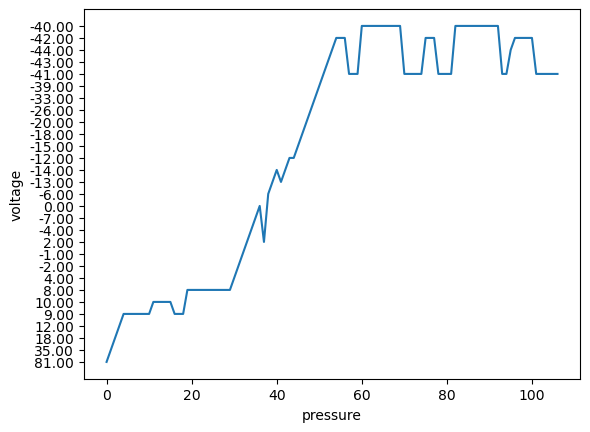

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(v_out)
df.to_csv('output.csv', index=False, encoding='cp949')

# t = np.linspace(0,len(v_out), len(v_out))
plt.plot(v_out)
# plt.plot(t)
# plt.title('model accuracy')
plt.ylabel('voltage')
plt.xlabel('pressure')
# plt.legend(['train', 'test'], loc='upper left')
plt.show()